In [1]:
import numpy as np
import matplotlib.pyplot as plt

NODE_NUMBER = 7
alpha = 0.1
gamma = 1

## the left figure of example 6.2

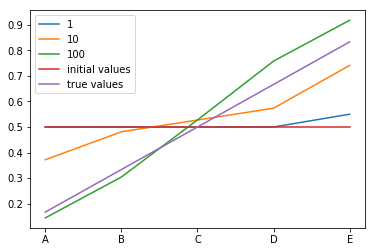

In [2]:
def example_6_2_left(episodes):
    v = [0.5]*NODE_NUMBER
    v[0] = v[-1] = 0
    label = ['1','10','100','initial values', 'true values']
    for episode in range(episodes):
        state = 3
        reward = 0
        while 0 < state < NODE_NUMBER-1:
            direction = np.random.choice([-1,1])
            new_state = state + direction
            if new_state == NODE_NUMBER - 1:
                reward = 1
            v[state] += alpha*(reward + gamma*v[new_state] - v[state])
            state = new_state

        if episode == 0:
            plt.plot(range(1,NODE_NUMBER-1), v[1:-1])
        elif episode == 9:
            plt.plot(range(1,NODE_NUMBER-1), v[1:-1])
        elif episode == 99:
            plt.plot(range(1,NODE_NUMBER-1), v[1:-1])
    plt.plot(range(1,NODE_NUMBER-1), [0.5]*5)
    plt.plot(range(1,NODE_NUMBER-1), np.array(range(1,NODE_NUMBER-1))/6)
    plt.legend(label)
    plt.xticks([1,2,3,4,5],['A','B','C','D','E'])

example_6_2_left(100)

## the right figure of example 6.2

In [7]:
def random_walk(method, node_number=NODE_NUMBER):
    state = 3
    trajectory = [state]
    rewards = [0]
    while 0 < state < node_number - 1:
        direction = np.random.choice([-1,1])
        state += direction
        if state == node_number - 1:
            reward = 1
        else:
            reward = 0
        trajectory.append(state)
        rewards.append(reward)
    if method == 'MC':
        for i in range(len(rewards)-1,0,-1):
            rewards[i-1] = gamma*rewards[i]    # all 0 or 1 dependent on the last reward in this case
    return trajectory, rewards

def updating(v, method, trajectories, rewards_, batch, alpha, gamma=1): 
    flag = True
    while flag:
        new_v = v.copy()
        for trajectory, rewards in zip(trajectories[::-1], rewards_[::-1]):
            for i in range(len(trajectory)-1):
                state = trajectory[i]
                if method == 'MC':
                    new_v[state] += alpha*(rewards[i+1] - new_v[state]) # the reward here has been processed
                elif method == 'TD':
                    new_state = trajectory[i+1]
                    new_v[state] += alpha*(rewards[i+1] + gamma*new_v[new_state] - new_v[state])
                else:
                    raise ValueError('the method is not supported here ==')
            if not batch: # just use the last trajectory to update if batch=False
                flag = False
                break
        if sum(abs(new_v - v)) < 1e-3:
            break
        v = new_v
    return v

def RMS_error(method, batch, alpha=alpha, gamma=1, episodes=100, runs=100, node_number=NODE_NUMBER):
    avg_errs = np.zeros(episodes)
    true_values = np.array(range(1, node_number-1))/6 # true values of A-E
    for run in range(runs):
        # #### initialize ######
        v = np.zeros(node_number) + 0.5
        v[0] = v[-1] = 0
        errs = np.zeros(episodes)
        trajectories = []
        rewards = []
        for episode in range(episodes):
            trajectory, rewards_ = random_walk(method)
            trajectories.append(trajectory)
            rewards.append(rewards_)
            v = updating(v, method, trajectories, rewards, batch=batch, alpha=alpha, gamma=gamma)
            error = np.sqrt(sum((v[1:-1] - true_values)**2)/(node_number-2))
            errs[episode] = error
        avg_errs += errs
    return avg_errs/runs

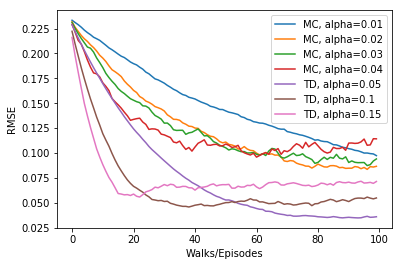

In [8]:
episodes = 100
method = 'MC'
for alpha in [0.01, 0.02, 0.03, 0.04]:
    plt.plot(range(episodes), RMS_error(method=method, batch=False, alpha=alpha), label=method+f', alpha={alpha}')

method = 'TD'
for alpha in [0.05, 0.1, 0.15]:
    plt.plot(range(episodes), RMS_error(method=method, batch=False, alpha=alpha), label=method+f', alpha={alpha}')
plt.legend()
plt.xlabel('Walks/Episodes')
plt.ylabel('RMSE')
plt.show()

## Figure 6.2: batch training

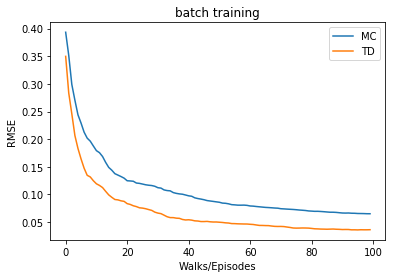

In [9]:
plt.plot(range(100), RMS_error(method='MC', batch=True, alpha=0.01), label='MC')
plt.plot(range(100), RMS_error(method='TD', batch=True, alpha=0.01), label='TD')
plt.xlabel('Walks/Episodes')
plt.ylabel('RMSE')
plt.title('batch training')
plt.legend()
plt.show()